## Speech Emotion Recognition

### Libraries :

In [79]:
import os
import random
from IPython.display import Audio
import librosa
import librosa.display as disp
import matplotlib.pyplot as plt
import numpy as np

### Implementation :

In [12]:
path ='./speech_emotion/'

def load_data(path):
    f_emotions = []
    f_pathes = []
    folders = os.listdir(path)
    for folder in folders:
        files = os.listdir(path + folder)
        for file in files:
            step = file.split('.')[0]
            step = step.split('-')[2]
            f_emotions.append(int(step))
            f_pathes.append(path + folder + os.sep + file)
    return [f_emotions,f_pathes]
 
def get_emotion(number):
    
    info={1 : 'neutral',
          2 : 'calm' ,
          3 : 'happy',
          4 : 'sad',
          5 : 'angry',
          6 : 'fearful',
          7 : 'disgust',
          8 : 'surprised'}
    
    return info[number]
          
emotions, pathes = load_data(path)
        

In [80]:
def read_audio(path):
    data,sample_rate = librosa.load(path)
    return data, sample_rate

def draw_wave(path,data, sr):
    plt.figure(figsize=(10,4))
    #data, sr = librosa.load(path)
    plt.title('Audio Wave : ' + path, size =12)
    disp.waveshow(data,sr=sr)
    plt.show()

    
def draw_spectogram(path,data, sr):
    plt.figure(figsize=(10,4))
    #data, sr = librosa.load(path)
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.title('spectogram for Wave : ' + path, size =12 )
    disp.specshow(Xdb,sr=sr, x_axis ='time', y_axis = 'hz')
    plt.show()

    
def add_noise(data,sr):
    noise = 0.035 * np.random.uniform()*np.amax(data)
    data+= noise * np.random.normal(size=data.shape[0])
    
    return data, sr

def shift(data,sr):
    shift_range = int(np.random.uniform(low=-5, high=5)*1000)
    shifted = np.roll(data,shift_range)
    
    return shifted,sr

def pitch(data,sr,factor=0.7):
    pitched = librosa.effects.pitch_shift(y=data, sr = sr , n_steps=factor)
    
    return pitched, sr
    

def stretch(data,sr, rate=0.55):
    stretched = librosa.effects.time_stretch(y=data, rate=0.55)
    
    return stretched, sr 
###  Extract Feature  MFCCs:

def feature_extraction(data,sr):
    mfcc = librosa.feature.mfcc(y=data, sr = sr)
    
    return mfcc
    
def processing_audio(data, sr, options):
    
    func = random.choice(options)
    
    if func == 'Standard':
        processed = data
    else:
        processed, _ = func(data,sr)
    return processed
    

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.2513413e-06
  1.1593802e-06 -2.9327066e-06]
20
angry


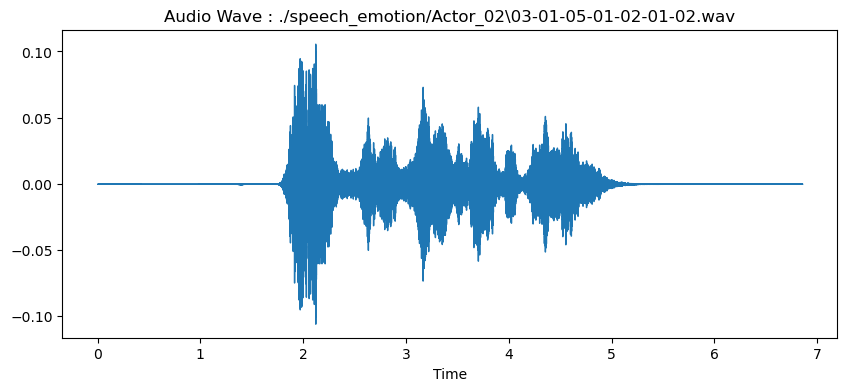

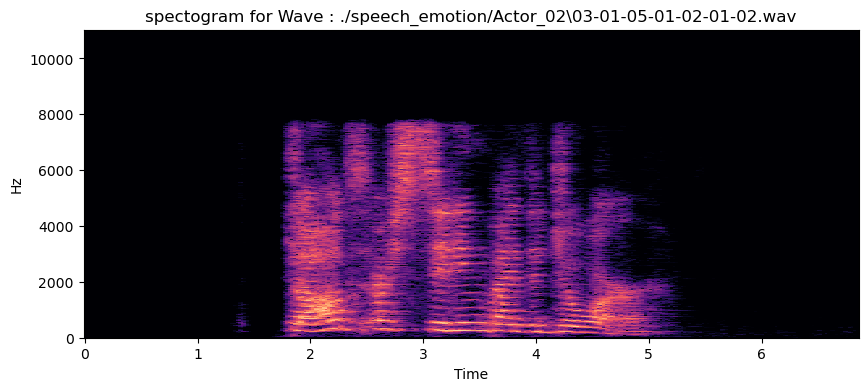

In [81]:
def get_features(path):
    
    data,sample_rate = read_audio(path)
    
    funcs=['Standard',add_noise,pitch]
    
    func1_data = processing_audio(data, sample_rate, funcs)
    
    return func1_data


def display(number):
    
    data, sample_rate = read_audio(pathes[number])
    mfcc_features = feature_extraction(data, sample_rate)
    print(len(mfcc_features))
    
    print(get_emotion(emotions[number]))
    
    #data, sample_rate = add_noise(data, sample_rate)
    #data, sample_rate = shift(data, sample_rate)
    #data, sample_rate = pitch(data, sample_rate)
    data, sample_rate = stretch(data, sample_rate)
    draw_wave(pathes[number], data, sample_rate)
    draw_spectogram(pathes[number], data, sample_rate)
    
    return data, sample_rate
    

print(get_features(pathes[70]))  
d , sr = display(90)
Audio(data=d, rate=sr)

### Extract Feature 